In [49]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@文件        :020.mouse_liver_development.ipynb
@说明        :used to analyse the mouse liver development data
@时间        :2023/08/20 10:37:35
@作者        :Wu Baosheng
@版本        :1.0
'''

'\n@文件        :020.mouse_liver_development.ipynb\n@说明        :used to analyse the mouse liver development data\n@时间        :2023/08/20 10:37:35\n@作者        :Wu Baosheng\n@版本        :1.0\n'

In [1]:
import os, sys, re, anndata
import scanpy as sc
import scanpy.external as sce
from numpy.random import seed
import pandas as pd
import numpy as np
from anndata import read_mtx
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
def read_geneExpress(file_path="", sep="\t", header=0, index_col=0, min_genes=200, max_genes=2500, min_cells=3):
    df = pd.read_csv(file_path, sep=sep, header=header, index_col=index_col).T
    cellinfo = pd.DataFrame(df.index, index=df.index, columns=['sample_index'])
    geneinfo = pd.DataFrame(df.columns, index=df.columns, columns=['genes_index'])
    adata = sc.AnnData(df, obs=cellinfo, var=geneinfo)
    adata.var_names = [i.upper() for i in list(adata.var_names)]
    #    sc.pp.filter_cells(adata, min_genes=min_genes)
    #    sc.pp.filter_cells(adata, max_genes=max_genes)
    #    sc.pp.filter_genes(adata, min_cells=min_cells)
    #    sc.pp.normalize_total(adata, inplace=True)
    #    sc.pp.log1p(adata)
    return adata
os.chdir('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/014.mouse_liver_development')

In [25]:
adata = read_geneExpress('./GSE136689_Counts_Matrix_AllCells_E8.5_E9.0_E9.5.txt')

C:\Users\wubaosheng\AppData\Local\Temp\ipykernel_6636\1595173753.py:21: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(df, obs=cellinfo, var=geneinfo)


In [26]:
annotation = pd.read_csv('./GSE136689_MetaFile_AllCells_E8.5_E9.0_E9.5_Final.txt',sep='\t',index_col=0)

In [27]:
adata.obs['stage'] = annotation['Stages'].astype('category')
adata.obs['cell_type'] = annotation['LineageAnnotations'].astype('category')


In [28]:
adata.layers["counts"] = adata.X.copy()

In [29]:
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [121]:
sc.pp.normalize_total(adata,target_sum=1e4)

In [122]:
adata.layers["CPM"]=adata.X.copy()

In [125]:
adata.var['genes_index'] = adata.var['genes_index'].astype('category')

In [126]:
adata.write('./mouse_liver_development.h5ad')

In [58]:
sc.pp.log1p(adata)
adata.raw = adata

In [59]:
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000, inplace=True,batch_key="stage")

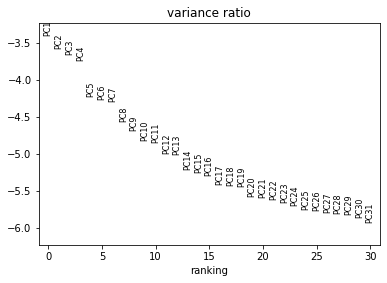

In [60]:
sc.pp.scale(adata)
sc.pp.pca(adata, n_comps=50, svd_solver='arpack',use_highly_variable=True)
sc.pl.pca_variance_ratio(adata, log=True)

In [73]:
sce.pp.harmony_integrate(adata, key="stage",max_iter_harmony=20)

2023-08-20 11:58:53,076 - harmonypy - INFO - Iteration 1 of 20
2023-08-20 11:59:02,570 - harmonypy - INFO - Iteration 2 of 20
2023-08-20 11:59:12,275 - harmonypy - INFO - Iteration 3 of 20
2023-08-20 11:59:22,392 - harmonypy - INFO - Iteration 4 of 20
2023-08-20 11:59:32,062 - harmonypy - INFO - Iteration 5 of 20
2023-08-20 11:59:40,214 - harmonypy - INFO - Iteration 6 of 20
2023-08-20 11:59:49,583 - harmonypy - INFO - Iteration 7 of 20
2023-08-20 11:59:59,118 - harmonypy - INFO - Iteration 8 of 20
2023-08-20 12:00:06,121 - harmonypy - INFO - Iteration 9 of 20
2023-08-20 12:00:13,652 - harmonypy - INFO - Iteration 10 of 20
2023-08-20 12:00:19,788 - harmonypy - INFO - Iteration 11 of 20
2023-08-20 12:00:25,965 - harmonypy - INFO - Iteration 12 of 20
2023-08-20 12:00:31,667 - harmonypy - INFO - Iteration 13 of 20
2023-08-20 12:00:37,535 - harmonypy - INFO - Iteration 14 of 20
2023-08-20 12:00:43,248 - harmonypy - INFO - Iteration 15 of 20
2023-08-20 12:00:49,485 - harmonypy - INFO - Iter

In [74]:
sc.pp.neighbors(adata,n_neighbors=15, n_pcs=40,use_rep="X_pca_harmony")

In [75]:
sc.tl.umap(adata)

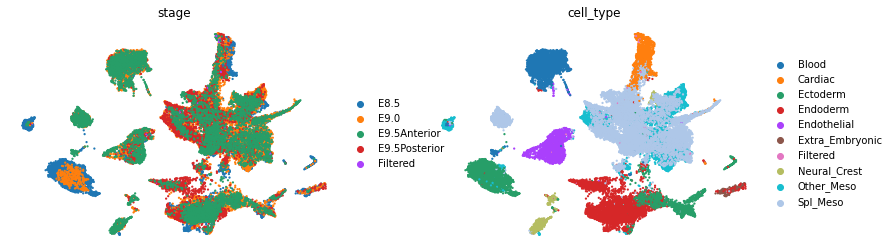

In [76]:
sc.pl.umap(adata, color=['stage','cell_type'], title=["stage",'cell_type'], palette=sc.pl.palettes.default_20, show=True, alpha=1,size=20,add_outline=True,outline_color=["white","white"],frameon=False)

In [2]:
mouse = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/13.homoGenes/mouse.homoGenes.txt',sep='\t',header=0,index_col=0)
mouse.fillna('no value', inplace=True)

In [3]:
mouse_wgd = []
for index, row in mouse.iterrows():
    if row['lancelet']== 'no value':
        line = row['mouse'].split(',')
        line2 = [x.strip() for x in line]
        mouse_wgd = mouse_wgd + line2
    else:
        tmp =len(row['mouse'].split(','))-len(row['lancelet'].split(','))
        line = row['mouse'].split(',')
        line2 = [x.strip() for x in line]
        mouse_wgd = mouse_wgd + line2[tmp: ]


    # line = i.split(',')
    # line2 = [x.strip() for x in line]
    # human_wgd = human_wgd + line2[0: ]

In [4]:
len(mouse_wgd)

5465

In [9]:
df_R1=pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/13.homoGenes/mouse_2R.txt',sep='\t',header=0,index_col=0)
df_R1.fillna('no value', inplace=True)
R2 = []
for index, row in df_R1.iterrows():
    if row['lamprey']== 'no value':
        line = row['mouse'].split(',')
        line2 = [x.strip() for x in line]
        R2 = R2 + line2
    else:
        tmp =len(row['mouse'].split(','))-len(row['lamprey'].split(','))
        line = row['mouse'].split(',')
        line2 = [x.strip() for x in line]
        R2 = R2 + line2[tmp: ]

In [6]:
R1=[x for x in mouse_wgd if x not in R2]
R1=[x.upper() for x in R1]
R2=[x.upper() for x in R2]


In [7]:
len(R1)

2058

In [8]:
df_R1

,Orthogroup,bichir,dogshark,frog,human,lamprey,lancelet,lungfish,mouse
52,OG0000052,"BICHIR120524912, BICHIR120524913, BICHIR120524...","DOGSHARK010424, DOGSHARK021135, DOGSHARK021136...","FROG001044, FROG001841, FROG033843, FROG033849...","KRT1, KRT2, KRT3, KRT5, KRT6A, KRT6B, KRT6C, K...","QSM008425, QSM020967, QSM020971, QSM020973, QS...","LOC118403903, LOC118403905","GENE15525, GENE18968, GENE19705, GENE19799, GE...","GM5414, GM5478, KRT1, KRT2, KRT4, KRT5, KRT6A,..."
56,OG0000056,"BICHIR120519198, BICHIR120519220, BICHIR120519...","DOGSHARK000635, DOGSHARK015355, DOGSHARK015356...","FROG009849, FROG009850, FROG014931, FROG014932...","CRYGA, CRYGB, CRYGC, CRYGD, CRYGS","QSM115387, QSM115465, QSM160329, QSM162033",LOC118412053,"GENE10072, GENE10370, GENE10404, GENE15671, GE...","CRYGA, CRYGB, CRYGC, CRYGD, CRYGE, CRYGF, CRYGS"
86,OG0000086,"BICHIR120529716, BICHIR120529726, BICHIR120539...","DOGSHARK008810, DOGSHARK008811, DOGSHARK008812...","FROG004166, FROG033798, FROG033799, FROG033805...","AZGP1, HFE, HLA-A, HLA-B, HLA-C, HLA-E, HLA-F,...",no value,no value,"GENE1434, GENE19069, GENE19255, GENE19284, GEN...","AZGP1, GM11127, GM7030, GM8909, H2-D1, H2-K1, ..."
88,OG0000088,"BICHIR120538155, BICHIR120542357, BICHIR120542...","DOGSHARK006640, DOGSHARK006641, DOGSHARK007269...","F0021, FROG006392, FROG006393, FROG006394, FRO...","CYGB, HBA1, HBA2, HBB, HBD, HBE1, HBG1, HBG2, ...","QSM114803, QSM126551",no value,"GENE1132, GENE14234, GENE15680, GENE260, GENE4...","CYGB, HBA-A1, HBA-A2, HBA-X, HBB-BH1, HBB-BH2,..."
99,OG0000099,"BICHIR120522245, BICHIR120522246, BICHIR120536...","DOGSHARK005585, DOGSHARK005586, DOGSHARK009579...","FROG004929, FROG004969, FROG033112",IRGC,no value,LOC118424024,"GENE17706, GENE17867, GENE18205, GENE18390, GE...","9930111J21RIK1, 9930111J21RIK2, F830016B08RIK,..."
...,...,...,...,...,...,...,...,...,...
13945,OG0013945,BICHIR120514971,no value,no value,no value,no value,no value,GENE3060,CRYZL2
13981,OG0013981,no value,DOGSHARK007728,no value,no value,no value,no value,GENE7228,2010106E10RIK
14068,OG0014068,no value,DOGSHARK012426,FROG048930,no value,no value,no value,no value,NDOR1
14082,OG0014082,no value,DOGSHARK001146,no value,no value,no value,no value,GENE14317,ARHGAP26


In [ ]:
len(set(mouse_wgd).intersection(set(adata.var_names[adata.var['highly_variable']])))

In [40]:
adata.obs['stage'].unique()

['E8.5', 'Filtered', 'E9.0', 'E9.5Posterior', 'E9.5Anterior']
Categories (5, object): ['E8.5', 'Filtered', 'E9.0', 'E9.5Posterior', 'E9.5Anterior']

In [42]:
e8=adata[adata.obs['stage']=='E8.5']

In [43]:
adata.X=adata.layers['counts']
sc.pp.normalize_total(adata,target_sum=1e4)
sc.pp.log1p(adata)
e8=adata[adata.obs['stage']=='E8.5']
sc.pp.highly_variable_genes(e8, flavor='seurat', n_top_genes=2000, inplace=True)

c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [44]:
e8 = e8[:, e8.var['highly_variable']]

In [160]:
with open('./e8_high_variable_genes.txt','w') as f:
    f.write('\n'.join(e8.var_names))
f.close()

In [45]:
len(set(e8.var_names).intersection(R2))

430

In [197]:
human_rerto = pd.read_excel('H:/002.singcell/01.liver/10.mutileSpecies/08.WGD/05.newGenes/Retrogenes.xlsx', sheet_name='human', index_col=None, header=0,engine='openpyxl')
mouse_denovo = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/08.WGD/05.newGenes/mouse_denovo.txt',header=None,sep='\t',index_col=None,names=['gene','qsm'])

In [201]:
print(len(set(e8.var_names).intersection(human_rerto['genes'])))
print(len(set(e8.var_names).intersection(mouse_denovo['gene'])))

1
8


In [46]:
adata.X=adata.layers['counts']
sc.pp.normalize_total(adata,target_sum=1e4)
sc.pp.log1p(adata)
e9=adata[adata.obs['stage']=='E9.0']
sc.pp.highly_variable_genes(e9, flavor='seurat', n_top_genes=2000, inplace=True)
e9 = e9[:, e9.var['highly_variable']]
with open('./e9_high_variable_genes.txt','w') as f:
    f.write('\n'.join(e9.var_names))
f.close()
print(f'R1+R2: {len(set(e9.var_names).intersection(R2+R1))}')
print(f'R1: {len(set(e9.var_names).intersection(R1))}')
print(f'R2: {len(set(e9.var_names).intersection(R2))}')
print(len(set(e9.var_names).intersection(human_rerto['genes'])))
print(len(set(e9.var_names).intersection(mouse_denovo['gene'])))

c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


R1+R2: 602
R1: 200
R2: 402


c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


NameError: name 'human_rerto' is not defined

In [204]:
adata.X=adata.layers['counts']
sc.pp.normalize_total(adata,target_sum=1e4)
sc.pp.log1p(adata)
e95_p=adata[adata.obs['stage']=='E9.5Posterior']
sc.pp.highly_variable_genes(e95_p, flavor='seurat', n_top_genes=2000, inplace=True)
e95_p = e95_p[:, e95_p.var['highly_variable']]
with open('./e95_p_high_variable_genes.txt','w') as f:
    f.write('\n'.join(e95_p.var_names))
f.close()
print(f'R1+R2: {len(set(e95_p.var_names).intersection(R2+R1))}')
print(f'R1: {len(set(e95_p.var_names).intersection(R1))}')
print(f'R2: {len(set(e95_p.var_names).intersection(R2))}')
print(len(set(e95_p.var_names).intersection(human_rerto['genes'])))
print(len(set(e95_p.var_names).intersection(mouse_denovo['gene'])))

c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


R1+R2: 620
R1: 211
R2: 409
3
3


c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [205]:
adata.X=adata.layers['counts']
sc.pp.normalize_total(adata,target_sum=1e4)
sc.pp.log1p(adata)
e95_a=adata[adata.obs['stage']=='E9.5Anterior']
sc.pp.highly_variable_genes(e95_a, flavor='seurat', n_top_genes=2000, inplace=True)
e95_a = e95_a[:, e95_a.var['highly_variable']]
with open('./e95_a_high_variable_genes.txt','w') as f:
    f.write('\n'.join(e95_a.var_names))
f.close()
print(f'R1+R2: {len(set(e95_a.var_names).intersection(R2+R1))}')
print(f'R1: {len(set(e95_a.var_names).intersection(R1))}')
print(f'R2: {len(set(e95_a.var_names).intersection(R2))}')
print(len(set(e95_a.var_names).intersection(human_rerto['genes'])))
print(len(set(e95_a.var_names).intersection(mouse_denovo['gene'])))

c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


R1+R2: 553
R1: 189
R2: 364
2
4


c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [232]:
[x for x in e8.var_names if 'FLT4' in x]

['FLT4']

In [213]:
adata.var_names_make_unique()

In [220]:
adata=adata[~(adata.obs['stage']=='Filtered')]

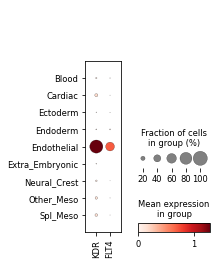

In [224]:
sc.pl.dotplot(adata,['KDR','FLT4'],groupby='cell_type')

c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


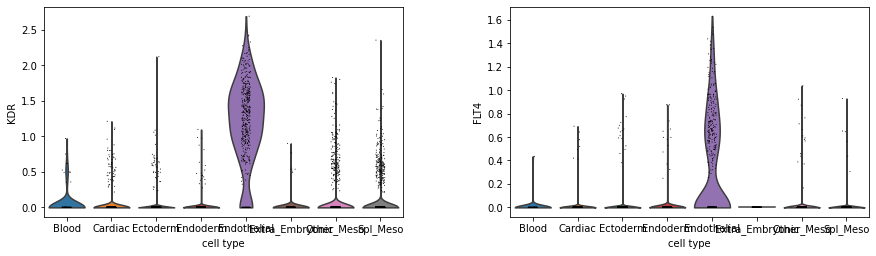

In [226]:
sc.pl.violin(e8,['KDR','FLT4'],groupby='cell_type')

c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


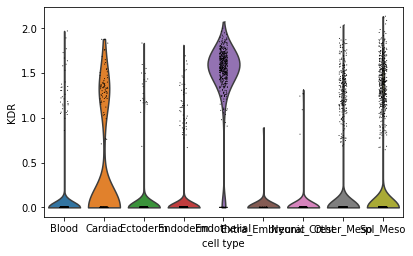

In [234]:
sc.pl.violin(e9,['KDR'],groupby='cell_type')

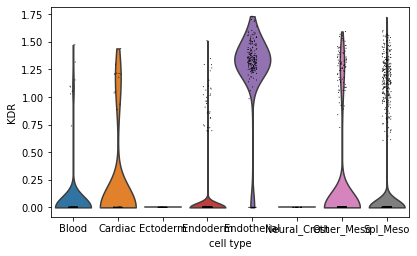

In [236]:
sc.pl.violin(e95_p,['KDR'],groupby='cell_type')

c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


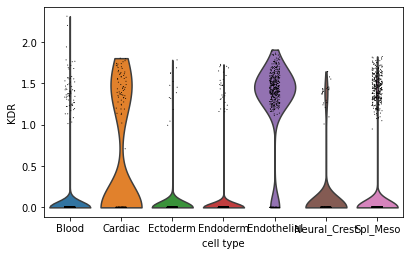

In [237]:
sc.pl.violin(e95_a,['KDR'],groupby='cell_type')

In [239]:
endo_marker = ['SEMA6A','CALCRL','NRP2','TUBA1A','TGFBR3','APLNR','OIT3','TMEM204','PLPP3','VWF','SGK1','CRIM1','FLT4','ADGRL4','MYO1C','RARB','PLXND1','SHE','PLK2','FGD5','FLI1','FLT1','ASAP1','TEK','RGS3','TANC2','SPTBN1']

In [240]:
len(endo_marker)

27

In [244]:
set(R2).intersection(set(endo_marker))

{'FGD5', 'SHE', 'TEK'}

In [2]:
mouse_atac=pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/014.mouse_liver_development/scACAT.txt',index_col=None,sep='\t',header=None,names=['chr','UMI'])

In [3]:
mouse_atac['id']=mouse_atac['chr'].str.split(':',expand=True)[0]

In [4]:
mouse_atac['start']=mouse_atac['chr'].str.split(':',expand=True)[1].str.split('-',expand=True)[0]

In [5]:
mouse_atac['end']=mouse_atac['chr'].str.split(':',expand=True)[1].str.split('-',expand=True)[1]

In [6]:
mouse_atac['length'] = mouse_atac['end'].astype(int) - mouse_atac['start'].astype(int)

In [7]:
mouse_atac['TPM']=mouse_atac['UMI'].astype(float)/mouse_atac['length'].sum()*1000000

In [8]:
mouse_atac=mouse_atac[mouse_atac['TPM']<50]

In [9]:
mouse_atac

,chr,UMI,id,start,end,length,TPM
0,chr10:100001532-100001667,47,chr10,100001532,100001667,135,0.332376
1,chr10:100010109-100010715,30,chr10,100010109,100010715,606,0.212155
2,chr10:100013826-100020189,1642,chr10,100013826,100020189,6363,11.611938
3,chr10:100022150-100022719,15,chr10,100022150,100022719,569,0.106077
4,chr10:100025384-100026163,185,chr10,100025384,100026163,779,1.308288
...,...,...,...,...,...,...,...
162723,chrY:90803545-90803811,38,chrY,90803545,90803811,266,0.268729
162724,chrY:90804478-90805450,391,chrY,90804478,90805450,972,2.765084
162725,chrY:90807112-90809625,498,chrY,90807112,90809625,2513,3.521769
162726,chrY:90810389-90813288,424,chrY,90810389,90813288,2899,2.998454


In [10]:
blast=pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/014.mouse_liver_development/02.blastnParse.py.out',index_col=None,sep='\t',header=None,names=['human','mouse'])

In [61]:
blast_dir = blast.set_index('human')['mouse'].to_dict()

In [ ]:
blast_dir

In [11]:
mouse_atac_high = mouse_atac[mouse_atac['chr'].isin(blast['mouse'])]

In [12]:
mouse_atac_high

,chr,UMI,id,start,end,length,TPM
47,chr10:102510952-102512958,448,chr10,102510952,102512958,2006,3.168178
85,chr10:10392716-10392881,6,chr10,10392716,10392881,165,0.042431
409,chr10:111502216-111512465,2850,chr10,111502216,111512465,10249,20.154704
425,chr10:111574135-111577149,868,chr10,111574135,111577149,3014,6.138345
711,chr10:116947851-116951390,1027,chr10,116947851,116951390,3539,7.262765
...,...,...,...,...,...,...,...
162369,chrX:7877432-7880492,996,chrX,7877432,7880492,3060,7.043539
162397,chrX:81070033-81073465,535,chrX,81070033,81073465,3432,3.783427
162631,chrX:99127111-99127794,19,chrX,99127111,99127794,683,0.134365
162633,chrX:99134748-99139765,1127,chrX,99134748,99139765,5017,7.969948


In [13]:
mouse_atac_low = mouse_atac[~mouse_atac['chr'].isin(blast['mouse'])]

In [14]:
mouse_atac_low['TPM'].mean()

1.0994553605940556

In [15]:
mouse_atac_high['TPM'].mean()

6.532828634869218

In [16]:
mouse_atac['high_low'] = ['high' if x in mouse_atac_high.index else 'low' for x in mouse_atac.index]

In [17]:
mouse_atac[mouse_atac['high_low']=='low']

,chr,UMI,id,start,end,length,TPM,high_low
0,chr10:100001532-100001667,47,chr10,100001532,100001667,135,0.332376,low
1,chr10:100010109-100010715,30,chr10,100010109,100010715,606,0.212155,low
2,chr10:100013826-100020189,1642,chr10,100013826,100020189,6363,11.611938,low
3,chr10:100022150-100022719,15,chr10,100022150,100022719,569,0.106077,low
4,chr10:100025384-100026163,185,chr10,100025384,100026163,779,1.308288,low
...,...,...,...,...,...,...,...,...
162723,chrY:90803545-90803811,38,chrY,90803545,90803811,266,0.268729,low
162724,chrY:90804478-90805450,391,chrY,90804478,90805450,972,2.765084,low
162725,chrY:90807112-90809625,498,chrY,90807112,90809625,2513,3.521769,low
162726,chrY:90810389-90813288,424,chrY,90810389,90813288,2899,2.998454,low


<AxesSubplot:xlabel='high_low', ylabel='TPM'>

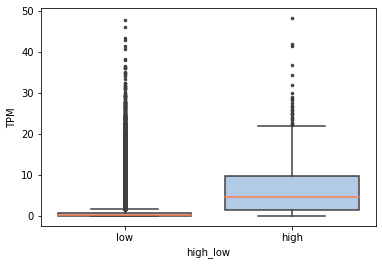

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt
# ax=sns.boxplot(x="high_low", y="TPM", data=mouse_atac,hue='high_low',dodge=False)
# sns.stripplot(x='high_low', y='TPM', data=mouse_atac, color='black', size=1, ax=ax)
sns.boxplot(
    data=mouse_atac, x="high_low", y="TPM",
    # notch=True, showcaps=False,
    flierprops={"marker": ".", "markersize": 5},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

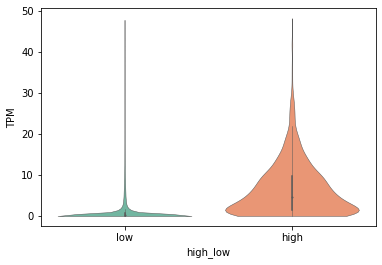

In [385]:
sns.violinplot(data=mouse_atac, x="high_low", y="TPM",scale="width", inner="box", cut=0, linewidth=0.5, palette="Set2")
plt.savefig("H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/014.mouse_liver_development/mouse_development_atac.pdf", bbox_inches='tight')

In [389]:
#### t test
from scipy.stats import ttest_ind
ttest_ind(mouse_atac[mouse_atac['high_low']=='high']['TPM'],mouse_atac[mouse_atac['high_low']=='low']['TPM'])

Ttest_indResult(statistic=66.65973389123154, pvalue=0.0)

In [18]:
mouse_atac_high

,chr,UMI,id,start,end,length,TPM
47,chr10:102510952-102512958,448,chr10,102510952,102512958,2006,3.168178
85,chr10:10392716-10392881,6,chr10,10392716,10392881,165,0.042431
409,chr10:111502216-111512465,2850,chr10,111502216,111512465,10249,20.154704
425,chr10:111574135-111577149,868,chr10,111574135,111577149,3014,6.138345
711,chr10:116947851-116951390,1027,chr10,116947851,116951390,3539,7.262765
...,...,...,...,...,...,...,...
162369,chrX:7877432-7880492,996,chrX,7877432,7880492,3060,7.043539
162397,chrX:81070033-81073465,535,chrX,81070033,81073465,3432,3.783427
162631,chrX:99127111-99127794,19,chrX,99127111,99127794,683,0.134365
162633,chrX:99134748-99139765,1127,chrX,99134748,99139765,5017,7.969948


In [19]:
def fasta2dic(fasta):
    import os,re,sys
    from Bio import SeqIO
    from Bio.Seq import Seq
    import pandas as pd
    human_dir={}
    records = SeqIO.parse(fasta, "fasta")
    for record in records:
        id = record.id
        seq = record.seq
        human_dir[id] = seq
    return human_dir


In [22]:
enhancer = fasta2dic('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/014.mouse_liver_development/yangmo.origin.fa')

In [23]:
counter = 0
target =[]
for x in enhancer.keys():
    if x in blast['human'].tolist():
        counter += 1
        target.append(x)
print(f'the number of enhancers that are conserved is {counter}')

the number of enhancers that are conserved is 146


In [57]:
df_human_liver_enhancer = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/015.enhancer/AllPredictions.AvgHiC.ABC0.015.minus150.ForABCPaperV3.txt',sep='\t',index_col=0)
df_human_liver_enhancer = df_human_liver_enhancer[df_human_liver_enhancer['CellType']=='liver-ENCODE']

In [58]:
df_human_liver_enhancer[df_human_liver_enhancer['TargetGene'].isin(R1)].drop_duplicates(subset=['name'],keep='first')

,start,end,name,class,activity_base,TargetGene,TargetGeneTSS,TargetGeneExpression,TargetGenePromoterActivityQuantile,TargetGeneIsExpressed,...,powerlaw_contact,powerlaw_contact_reference,hic_contact_pl_scaled,hic_pseudocount,hic_contact_pl_scaled_adj,ABC.Score.Numerator,ABC.Score,powerlaw.Score.Numerator,powerlaw.Score,CellType
chr,,,,,,,,,,,,,,,,,,,,,
chr1,1208114,1208523,genic|chr1:1207964-1208673,genic,4.833947,UBE2J2,1209234,NaN,0.734602,True,...,0.125372,0.123436,0.048468,0.001216,0.049684,0.240169,0.064867,0.596683,0.086196,liver-ENCODE
chr1,1209080,1209611,promoter|chr1:1208930-1209761,promoter,7.759225,UBE2J2,1209234,NaN,0.734602,True,...,0.125372,0.123436,0.048468,0.001216,0.049684,0.385508,0.104122,0.957768,0.138357,liver-ENCODE
chr1,1217079,1217589,genic|chr1:1216929-1217739,genic,11.350953,UBE2J2,1209234,NaN,0.734602,True,...,0.082206,0.081132,0.018883,0.001216,0.020099,0.228139,0.061618,0.920927,0.133035,liver-ENCODE
chr1,1684450,1685073,genic|chr1:1684300-1685223,genic,5.394758,NADK,1709909,NaN,0.872739,True,...,0.030509,0.030281,0.012373,0.001216,0.013588,0.073306,0.018105,0.163361,0.018287,liver-ENCODE
chr1,1689561,1689761,genic|chr1:1689411-1689911,genic,9.396646,NADK,1709909,NaN,0.872739,True,...,0.036878,0.036564,0.014171,0.001216,0.015387,0.144587,0.035709,0.343576,0.038460,liver-ENCODE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX,153769512,153769712,genic|chrX:153769362-153769862,genic,7.078828,SLC10A3,153719029,NaN,0.749756,True,...,0.016553,0.016487,0.006585,0.001216,0.007801,0.055220,0.020675,0.116706,0.022449,liver-ENCODE
chrX,153770112,153770312,genic|chrX:153769962-153770462,genic,7.777634,SLC10A3,153719029,NaN,0.749756,True,...,0.016383,0.016318,0.005539,0.001216,0.006755,0.052536,0.019670,0.126918,0.024413,liver-ENCODE
chrX,153770892,153771374,genic|chrX:153770742-153771524,genic,12.060128,MPP1,154033802,NaN,0.587950,True,...,0.003916,0.003933,0.001505,0.001216,0.002721,0.032816,0.020757,0.047434,0.016525,liver-ENCODE


In [72]:
df_mouse_atac_high = df_human_liver_enhancer[df_human_liver_enhancer['name'].isin(blast['human'])]

In [73]:
df_mouse_atac_high=df_mouse_atac_high.drop_duplicates(subset=['name'],keep='first')

In [74]:
df_mouse_atac_high[df_mouse_atac_high['TargetGene'].isin(R2)]

,start,end,name,class,activity_base,TargetGene,TargetGeneTSS,TargetGeneExpression,TargetGenePromoterActivityQuantile,TargetGeneIsExpressed,...,powerlaw_contact,powerlaw_contact_reference,hic_contact_pl_scaled,hic_pseudocount,hic_contact_pl_scaled_adj,ABC.Score.Numerator,ABC.Score,powerlaw.Score.Numerator,powerlaw.Score,CellType
chr,,,,,,,,,,,,,,,,,,,,,
chr1,21671397,21672364,intergenic|chr1:21671247-21672514,intergenic,26.304502,C1QA,22962998,NaN,0.411398,True,...,0.000972,0.000984,0.000205,0.000972,0.001177,0.030965,0.015554,0.025889,0.010547,liver-ENCODE
chr1,26606112,26606636,promoter|chr1:26605962-26606786,promoter,13.140121,SH3BGRL3,26606212,NaN,0.865977,True,...,0.125372,0.123436,0.042142,0.001216,0.043358,0.569724,0.158123,1.621965,0.246040,liver-ENCODE
chr1,26946849,26947665,intergenic|chr1:26946699-26947815,intergenic,40.799530,PTAFR,28503455,NaN,0.436247,True,...,0.000826,0.000837,0.000325,0.000826,0.001150,0.046930,0.019518,0.034133,0.009794,liver-ENCODE
chr1,28498699,28498899,genic|chr1:28498549-28499049,genic,1.838767,PTAFR,28503455,NaN,0.436247,True,...,0.125372,0.123436,0.036465,0.001216,0.037680,0.069286,0.028815,0.226970,0.065126,liver-ENCODE
chr1,31296977,31297510,intergenic|chr1:31296827-31297660,intergenic,14.425468,SDC3,31381480,NaN,0.509492,True,...,0.010594,0.010579,0.007571,0.001216,0.008787,0.126761,0.047650,0.152602,0.039463,liver-ENCODE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX,39968051,39968533,intergenic|chrX:39967901-39968683,intergenic,12.617401,SRPX,38080177,NaN,0.447654,True,...,0.000697,0.000707,0.000113,0.000697,0.000810,0.010226,0.017051,0.008922,0.009132,liver-ENCODE
chrX,49023441,49023641,genic|chrX:49023291-49023791,genic,6.256536,PLP2,49028183,NaN,0.512058,True,...,0.125372,0.123436,0.030186,0.001216,0.031401,0.196464,0.081982,0.772282,0.138158,liver-ENCODE
chrX,70401856,70402056,intergenic|chrX:70401706-70402206,intergenic,6.368728,CXCR3,70838367,NaN,0.423212,True,...,0.002512,0.002529,0.000850,0.001216,0.002066,0.013157,0.015212,0.016105,0.008573,liver-ENCODE


In [ ]:
blast_dir = blast.set_index('mouse')['human'].to_dict()

In [78]:
mouse_atac_high['human_chr']=mouse_atac_high['chr'].map(blast_dir)

C:\Users\wubaosheng\AppData\Local\Temp\ipykernel_6636\4061197566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_atac_high['human_chr']=mouse_atac_high['chr'].map(blast_dir)


In [457]:
df_human_liver_enhancer[df_human_liver_enhancer['name'].isin(target)]['TargetGene'].to_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/015.enhancer/Fish_liver_enhancer_target_gene.txt',sep='\t',index=False,header=False)

In [81]:
df_human_liver_enhancer=df_human_liver_enhancer.drop_duplicates(subset=['name'],keep='first')

In [83]:
df_human_liver_enhancer_dir = df_human_liver_enhancer.set_index('name')['TargetGene'].to_dict()

In [85]:
mouse_atac_high['targetGene']=mouse_atac_high['human_chr'].map(df_human_liver_enhancer_dir)

C:\Users\wubaosheng\AppData\Local\Temp\ipykernel_6636\1899922543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_atac_high['targetGene']=mouse_atac_high['human_chr'].map(df_human_liver_enhancer_dir)


In [87]:
gene_info =[]
for x in mouse_atac_high['targetGene']:
    if x in R1:
        gene_info.append('R1')
    elif x in R2:
        gene_info.append('R2')
    else:
        gene_info.append('ancient')


In [90]:
mouse_atac_high['R1_R2']=gene_info

C:\Users\wubaosheng\AppData\Local\Temp\ipykernel_6636\2568889653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_atac_high['R1_R2']=gene_info


In [91]:
mouse_atac_high

,chr,UMI,id,start,end,length,TPM,human_chr,targetGene,R1_R2
47,chr10:102510952-102512958,448,chr10,102510952,102512958,2006,3.168178,promoter|chr12:86229863-86230568,RASSF9,R1
85,chr10:10392716-10392881,6,chr10,10392716,10392881,165,0.042431,genic|chr18:24723689-24724189,CHST9,R2
409,chr10:111502216-111512465,2850,chr10,111502216,111512465,10249,20.154704,promoter|chr12:76425235-76425806,PHLDA1,R1
425,chr10:111574135-111577149,868,chr10,111574135,111577149,3014,6.138345,intergenic|chr12:76337875-76338375,PHLDA1,R1
711,chr10:116947851-116951390,1027,chr10,116947851,116951390,3539,7.262765,promoter|chr12:70132098-70132982,RAB3IP,ancient
...,...,...,...,...,...,...,...,...,...,...
162369,chrX:7877432-7880492,996,chrX,7877432,7880492,3060,7.043539,promoter|chrX:48775948-48776924,PIM2,ancient
162397,chrX:81070033-81073465,535,chrX,81070033,81073465,3432,3.783427,promoter|chrX:34674942-34675734,TMEM47,ancient
162631,chrX:99127111-99127794,19,chrX,99127111,99127794,683,0.134365,intergenic|chrX:68040348-68040848,EFNB1,ancient
162633,chrX:99134748-99139765,1127,chrX,99134748,99139765,5017,7.969948,promoter|chrX:68048451-68049202,EFNB1,ancient


<AxesSubplot:xlabel='R1_R2', ylabel='TPM'>

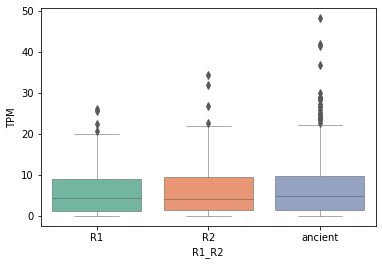

In [98]:
# sns.violinplot(data=mouse_atac_high, x='R1_R2', y="TPM", inner="box", cut=0, linewidth=0.5, palette="Set2")
sns.boxplot(data=mouse_atac_high, x='R1_R2', y="TPM", linewidth=0.5, palette="Set2")
# plt.savefig("H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/014.mouse_liver_development/mouse_development_atac.pdf", bbox_inches='tight')

In [10]:
endothelia_marker=["ITIH2","HABP2","PAH","HAO1","F2","ITIH3","HAL","F9","VTN","AMBP,","SORD","FGB","KNG1","HGD","SERPIND1","SERPINF2","FGA","HAAO","CP","PLG","HPD","C3","F7","TDO2","F10","FGG","CFI"]

In [11]:
len(endothelia_marker)

27

In [19]:
for i in endothelia_marker:
    if i not in set(endothelia_marker).intersection(set(R2)):
        print(i)

HABP2
PAH
HAO1
F2
HAL
F9
VTN
AMBP,
SORD
FGB
HGD
SERPIND1
FGA
HAAO
CP
PLG
HPD
C3
F7
TDO2
F10
FGG
CFI


In [20]:
set(endothelia_marker).intersection(set(R2))

{'ITIH2', 'ITIH3', 'KNG1', 'SERPINF2'}